# Sensitivity Analysis with any Given Data


Notebook developed by Saman Razavi and Cordell Blanchard, with extensive contribution from Scott Shambaugh. 

The core engine of D-VARS here has been taken with permission from the Monaco Python library (https://github.com/scottshambaugh/monaco) developed by https://github.com/scottshambaugh.


### For the VARS method, please cite:

Razavi, S., & Gupta, H. V. (2016). A new framework for comprehensive, robust, and efficient global sensitivity analysis: 1. Theory. Water Resources Research, 52(1), 423-439. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR017558

Razavi, S., & Gupta, H. V. (2016). A new framework for comprehensive, robust, and efficient global sensitivity analysis: 2. Application. Water Resources Research, 52(1), 440-455. https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2015WR017559

### For the Data-driven VARS (D-VARS) method, please cite:

Sheikholeslami, R., & Razavi, S. (2020). A fresh look at variography: measuring dependence and possible sensitivities across geophysical systems from any given data. Geophysical Research Letters, 47(20), e2020GL089829. https://doi.org/10.1029/2020GL089829

## Exercise 9: How to run D-VARS for a set of given input-output data
### Objective:

This notebook runs a sensitivity analysis on a set of input-output data, however sampled. The data set may follow any multi-variate distributional and correlational properties.

**Example research question 1:** Suppose there is a model that you don’t have access to run, but your colleague has already run it and taken a set of input-output sets with some unknown sampling strategy. How can you run a sensitivity analysis on this given data and identify the most important and the least important inputs and rank them?

**Example research question 2:** Suppose you need to develop a machine-learning model based on a set of given input-output data. The number of potential inputs to the model is large, and you like to do ‘input variable selection’ (also called ‘feature selection’) to possibly reduce the model size for parsimonious reasons. Which inputs may have the most predictive power and which ones do the least?

**Example research question 3:** Suppose you have collected data on a set of natural variables over some time. These variables might follow any distribution and might be related to each other in complex and unknown ways. What is the strength of possible relationship of each variable to every other variable?

First import the needed libraries, including `DVARS` for data-driven sensitivity analysis with D-VARS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from varstool import DVARS

### Read in the data file and check it out

The data file should be a csv file, with each column representing a variable and each row representing a data entry. The heading of each column is the name of the respective variable.

Two example data files are given with this exercise, `9a - sample_wavy6D.csv` and `9b - sample_HBV.csv`, generated in the appendix at the end of this exercise.

In the first example file, there are seven variables, sampled 500 times from the wavy6D test function, and the objective is to assess the sensitivity of `wavy6D_output` to `x1`, `x2`, ..., `x6`.

In the second example file, there are 13 variables, sampled 400 times from the HBV-SASK model, and the objective is to assess the sensitivity of `HBV_NSE` to `TT`, `C0`, `ETF`, ..., `PM`.

In [2]:
given_data = pd.read_csv ('9a - sample_wavy6D.csv')
# given_data = pd.read_csv ('9b - sample_HBV.csv')
display(given_data)

,x1,x2,x3,x4,x5,x6,wavy6D_output
0,0.027713,0.906700,0.881394,0.624897,0.790715,0.825908,-5.378960
1,0.841706,0.471728,0.957229,0.946592,0.529860,0.083640,-5.746152
2,0.269844,0.053800,0.566618,0.018918,0.205374,0.249355,-4.894333
3,0.898778,0.107797,0.748678,0.714704,0.740779,0.945117,-4.713161
4,0.459461,0.231635,0.464974,0.630711,0.965550,0.997082,-5.373822
...,...,...,...,...,...,...,...
495,0.026164,0.532380,0.326158,0.385910,0.164666,0.513459,-5.273700
496,0.029161,0.246084,0.227549,0.792478,0.266575,0.568880,-4.751507
497,0.243009,0.810721,0.842889,0.329628,0.447634,0.219051,-6.121655
498,0.505491,0.737061,0.696368,0.749502,0.338402,0.329874,-6.122999


### Set up a D-VARS experiment


Create a D-VARS experiment and set its attributes, according to the table below.
***
<p><center>Table 3. The attributes of the D-VARS algorithm </center></p>

| Attribute             | Description |
| :--------------------:|:----------- |
|`data_file`            | A csv file containing the 'given data' for sensitivity analysis                   |
|`outvarname`           | The name of the variable in the data set considered as output
|`ivars_range`          | IVARS scale range of interest for reporting purposes, e.g., 0.5 refers to IVARS50    |
|`phi0`                 | The initial starting point for the optimization algorithm within DVARS, any value between 1e-3 to 1 is expected to work well for most cases.|
|`phi_max`              | The upper bound for phi's in the optimization algorithm within DVARS, any value between 1e3 to 1e6 is expected to work well for most cases.|
|`tol`              | The tolerance level based on which the optimization algorithm within DVARS assumes convergence. The default value, 1e-6, is expected to work well for all cases.|
|`correlation_func_type`| The shape of assumed correlation function. Options include `linear`, `exponential` and `square`. The first option is expected to work best for most cases.|
|`report_verbose`       | this is a `True`/`False` value that if `True` will display the progress of the optimization algorithm within DVARS|


In [3]:
# Define Experiment 1
experiment_1 = DVARS(        
                        data_file = '9a - sample_wavy6D.csv',
                        outvarname = 'wavy6D_output',
#                         data_file = '9b - sample_HBV.csv',  
#                         outvarname = 'HBV_NSE',
                        ivars_range= 0.5,
                        phi0= 1,
                        phi_max= 1e6,
                        tol = 1e-5,
                        correlation_func_type= 'linear', 
                        report_verbose = True,
                    )

### Run D-VARS

Now, run the D-VARS experiment set up above.

In [4]:
experiment_1.run()

Calculating optimal hyperparameters Φ for 'wavy6D_output' covariances...
L = 943.2956, Φ = [1. 1. 1. 1. 1. 1.]
L = 943.2956, Φ = [1.00000001 1.         1.         1.         1.         1.        ]
L = 943.2956, Φ = [1.         1.00000001 1.         1.         1.         1.        ]
L = 943.2956, Φ = [1.         1.         1.00000001 1.         1.         1.        ]
L = 943.2956, Φ = [1.         1.         1.         1.00000001 1.         1.        ]
L = 943.2956, Φ = [1.         1.         1.         1.         1.00000001 1.        ]
L = 943.2956, Φ = [1.         1.         1.         1.         1.         1.00000001]
L = 1459.3487, Φ = [190.15719808  40.40102739   0.           0.           0.
   0.        ]
L = 1459.3487, Φ = [190.15719809  40.40102739   0.           0.           0.
   0.        ]
L = 1459.3487, Φ = [190.15719808  40.4010274    0.           0.           0.
   0.        ]
L = 1459.3487, Φ = [1.90157198e+02 4.04010274e+01 1.00000000e-08 0.00000000e+00
 0.00000000e+00 0

L = 318.2195, Φ = [3.90242714 1.32396372 0.28087357 0.3020355  0.06488836 0.06488837]
L = 2603.3058, Φ = [0.         0.86684504 0.57152695 0.57399106 0.10726922 0.        ]
L = 2603.3049, Φ = [1.00000000e-08 8.66845043e-01 5.71526946e-01 5.73991057e-01
 1.07269224e-01 0.00000000e+00]
L = 2603.3058, Φ = [0.         0.86684505 0.57152695 0.57399106 0.10726922 0.        ]
L = 2603.3058, Φ = [0.         0.86684504 0.57152696 0.57399106 0.10726922 0.        ]
L = 2603.3058, Φ = [0.         0.86684504 0.57152695 0.57399107 0.10726922 0.        ]
L = 2603.3058, Φ = [0.         0.86684504 0.57152695 0.57399106 0.10726923 0.        ]
L = 2603.3057, Φ = [0.00000000e+00 8.66845043e-01 5.71526946e-01 5.73991057e-01
 1.07269224e-01 1.00000000e-08]
L = 337.1221, Φ = [2.54640856 1.16512375 0.38187005 0.39653484 0.07961489 0.0423409 ]
L = 337.1221, Φ = [2.54640857 1.16512375 0.38187005 0.39653484 0.07961489 0.0423409 ]
L = 337.1221, Φ = [2.54640856 1.16512376 0.38187005 0.39653484 0.07961489 0.0423409

L = 292.4493, Φ = [3.33470381 1.40532723 0.29637064 0.30382804 0.13079839 0.03552339]
L = 292.4493, Φ = [3.33470381 1.40532723 0.29637063 0.30382805 0.13079839 0.03552339]
L = 292.4493, Φ = [3.33470381 1.40532723 0.29637063 0.30382804 0.1307984  0.03552339]
L = 292.4493, Φ = [3.33470381 1.40532723 0.29637063 0.30382804 0.13079839 0.0355234 ]
Done calculating optimal hyperparameters


### Check out the results

When the DVARS analysis is completed, let's check out the results of sensitivity analysis.

D-VARS has four types of results, as outlined below. But, note that `ratios`, `IVARS` and `phi_opt` are effectively reporting the exact same thing. **basically, the user only needs to look at `ratios`.**

**ratios:** These outputs are the ratios of input sensitivity, which are the values of IVARS for each input divided by the summed of IVARS values for all of the inputs.

**IVARS:** These outputs are the direct IVARS values for the scale range of interest assigned in the setup of the experiment. 

**phi_opt:** These outputs are the optimal phi's of the theoretical correlation function at different directions found by the optimization algorithm. 

**variance:** This is the variance of the variable designated as the output. Note that all variables are rescaled between zero and one before feeding into D-VARS. Therefore, this variance estimate is not in the original unit of the variable.



In [5]:
display(experiment_1.ratios)
# display(experiment_1.ivars)
# display(experiment_1.phi_opt)
# display(experiment_1.variance)

,x1,x2,x3,x4,x5,x6
0.5,0.563214,0.282629,0.059604,0.061104,0.026305,0.007144


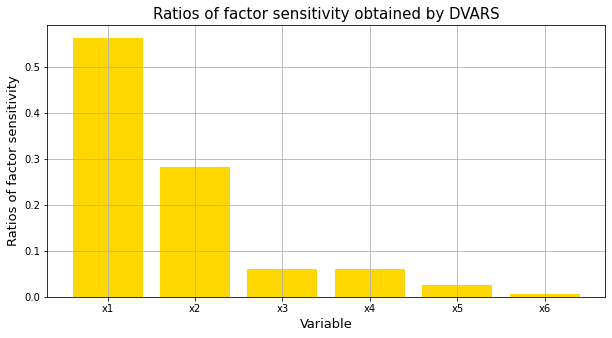

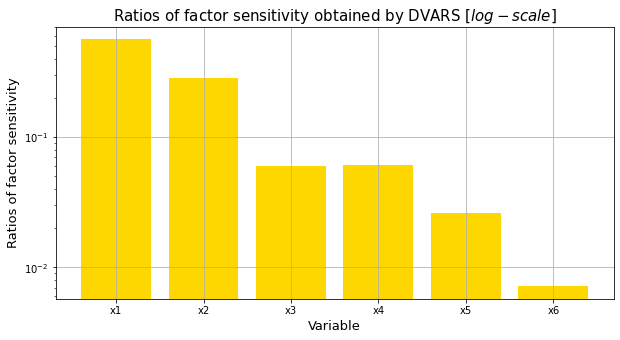

In [6]:
# plot the sensitivity indices
fig_bar = plt.figure(figsize=(10,5))
cols = experiment_1.ratios.columns
plt.gca().bar(cols, experiment_1.ratios.loc[experiment_1.ivars_range], color='gold')
plt.gca().set_title (r'Ratios of factor sensitivity obtained by DVARS', fontsize = 15)
plt.gca().set_ylabel(r'Ratios of factor sensitivity', fontsize = 13)
plt.gca().set_xlabel(r'Variable', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')

fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_1.ratios.loc[experiment_1.ivars_range], color='gold')
plt.gca().set_title (r'Ratios of factor sensitivity obtained by DVARS $[log-scale]$', fontsize = 15)
plt.gca().set_ylabel(r'Ratios of factor sensitivity', fontsize = 13)
plt.gca().set_xlabel(r'Variable', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('log')

### Appendix: 

This appendix is to run the wavy6D function or the HBV-SASK model to generate sample "given-data" for the above experiment. In real applications, however, the data set is already given, and you don't need to run the cells below.

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
from varstool.sensitivity_analysis import vars_funcs
import hbv

In [8]:
def wavy6D(x):
    '''wavy6D test function'''
    
# The features include:             
# (1) The 6 input factors are non-interacting                  
# (2) The function is "wavy" along the first 5 dimensions but with different 
#     frequencies and amplitude at different directions                                     
# (3) The last dimension (X6) is fully isensitive (dummy variable)                                         
# (4) It possess large-scale features such multi-modality (X1) 
#     to small-scale features such as roughness (X3)          
# (5) The directional variograms of X1 and X2 cross each other
    
    # check whether the input x is a dataframe
    
    if not isinstance(x, (pd.core.frame.DataFrame, pd.core.series.Series, np.ndarray, list)):
        raise TypeError('`x` must be of type pandas.DataFrame, numpy.ndarray, pd.Series, or list')
    
    if len(x) > 6:
        raise ValueError('`x` must have only five arguments at a time')
    
    y1 = -1*np.sin(2*np.pi*x[0]/2) - 0.3*np.sin(2*np.pi*x[0]/0.6)
    y2 = 0.76*(-1*np.sin(2*np.pi*(x[1]-0.2)/2)) - 0.315
    y3 = 0.12*(-1*np.sin(2*np.pi*(x[2]-0.2)/1.9)) + 0.02*(-1*np.sin(2*np.pi*x[2]/0.021)) - 0.96
    y4 = 0.12*(-1*np.sin(2*np.pi*(x[3]-0.2)/1.9))-0.97
    y5 = 0.05*(-1*np.sin(2*np.pi*(x[4]-0.2)/2))-1.02
    y6 = -1.08

    return y1 + y2 + y3 + y4 + y5 + y6

In [9]:
def custom_HBV_SASK_1(x):
    param = x.to_dict()
    # running the HBV-SASK Model
    basin = 'Oldman Basin'  # choose the basin of interest, either 'Oldman Basin' or 'Banff Basin'
    flux, state, forcing = hbv.HBV_SASK(basin, param)

    # choose the model response of interest, two options here: (1) direct model response or (2) performance metric
    
    # (1) for direct model response at a given time step, use the following
#     start_day = end_day = '2005-10-05' # choose the date of interest
#     out = flux['Q_cms'][start_day:end_day]
    
    # (2) for a performance metric over a given historical period, use the following
    start_day   ='1982-01-01'  # start date of the period over which the performance metric is computed
    end_day     ='1996-12-31'  # end date of the period over which the performance metric is computed
    # loading observed streamflow for comparison
    Qobs        = hbv.obs_streamflow(basin)
    mean_obs    = np.mean(Qobs[start_day:end_day], axis=0)
    denominator = np.mean((Qobs[start_day:end_day] - np.mean(Qobs[start_day:end_day], axis=0))**2, axis=0)
    numerator   = np.mean((Qobs[start_day:end_day].values.T - flux['Q_cms'][start_day:end_day].values)**2)
    nse         = 1 - numerator/denominator
    out         = nse.values[0]
    
    return out

In [10]:
# calculate wavy6D and put it in a csv file
rng = np.random.default_rng(seed=123456789)
rnd_samples = rng.random((500, 6))
simulation_df_1 = pd.DataFrame(rnd_samples, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6'])
simulation_df_1['wavy6D_output'] = simulation_df_1.apply(wavy6D, axis=1)
simulation_df_1.to_csv('9a - sample_wavy6D.csv', index=False)

In [11]:
# calculate HBV_SASK and put it in a csv file
parameters = { # name  lower bound upper bound
                 'TT'   : (  -4.00 ,  4.00    ),
                 'C0'   : (  0.00  ,   10.00  ),
                 'ETF'  : (  0.00  ,   1.00   ),
                 'LP'   : (  0.00  ,   1.00   ),
                 'FC'   : (  50.00 ,   500.00 ),
                 'beta' : (  1.00  ,   3.00   ),
                 'FRAC' : (  0.10  ,   0.90   ),
                 'K1'   : (  0.050 ,  1.00    ),
                 'alpha': (  1.00  ,  3.00    ),
                 'K2'   : (  0.00  ,  0.05    ),
                 'UBAS' : (  1.00  ,  3.00    ),
                 'PM'   : (  0.50  ,  2.00    ),}
np.random.seed(123456789)
rnd_samples = np.random.rand(400, len(parameters))
rnd_samples = vars_funcs.scale(rnd_samples,
                                     bounds={  # bounds are created while scaling
                                         'lb': [val[0] for _, val in parameters.items()],
                                         'ub': [val[1] for _, val in parameters.items()],
                                     }
                                     )

simulation_df_2 = pd.DataFrame(rnd_samples, columns=parameters.keys())
simulation_df_2['HBV_NSE'] = simulation_df_2.apply(custom_HBV_SASK_1, axis=1)
simulation_df_2.to_csv('9b - sample_HBV.csv', index=False)

All done!